# **E-Commerce Customer Churn**
### oleh: Dewi Maharani DP

## **Business Problem Understanding**

### Context Permasalahan
Dalam era digital saat ini, bisnis e-commerce menghadapi tantangan churn pelanggan, di mana pelanggan memilih untuk berhenti menggunakan layanan atau membeli produk. Mengatasi churn memerlukan strategi yang berorientasi data untuk mengidentifikasi dan mengintervensi pelanggan yang berisiko.

Dataset churn pelanggan menawarkan wawasan mendalam tentang faktor-faktor yang mempengaruhi keputusan pelanggan, seperti kepuasan, keluhan, dan preferensi pembelian. Memahami dan menganalisis data ini penting bagi perusahaan e-commerce untuk mengidentifikasi strategi yang efektif dalam mempertahankan pelanggan dan mengoptimalkan layanan, sehingga meningkatkan kepuasan dan loyalitas pelanggan.


### Problem Statement
Bagaimana cara mengidentifikasi pelanggan yang berpotensi churn sehingga strategi retensi yang tepat dapat diterapkan untuk meningkatkan retensi pelanggan dan mengurangi tingkat churn?

### Goals
1. Memprediksi pelanggan yang berisiko tinggi untuk churn.
2. Mengidentifikasi faktor-faktor utama yang berkontribusi terhadap churn pelanggan.
3. Mengembangkan strategi retensi pelanggan berdasarkan insight dari model prediksi.

### Analytic Approach
Menggunakan analisa data untuk menemukan pola yang membedakan pelanggan akan churn atau tidak. Kemudian melakukan prediksi menggunakan supervised machine learning yang akan mengevaluasi beberapa model klasifikasi yang memberikan prediksi paling akurat pada seorang pelanggan yang akan churn.

### Metric Evaluation
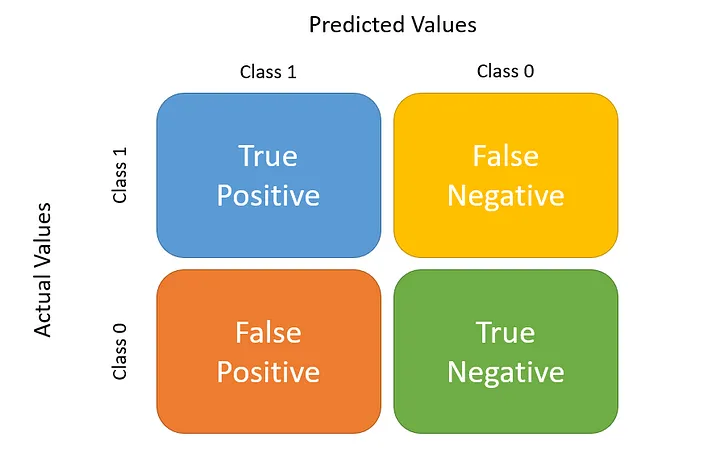

Fokus utama yaitu pelanggan yang akan berhenti berlangganan, maka target yang kita tetapkan adalah sebagai berikut:

Target :

0 : Tidak berhenti berlangganan  
1 : Berhenti berlangganan (churn)

Confusion Metrix Term:

*   True Positive: customernya aktualnya churn dan diprediksi churn
*   True Negative: customernya aktualnya tidak churn dan diprediksi tidak churn
*   False Negative: customernya aktualnya churn dan diprediksi tidak churn
*   False Positive: customernya aktualnya tidak churn dan diprediksi churn

Type 1 error : False Negatif  
* Konsekuensi: Pelanggan benar-benar churn
* Efek samping: Adanya cost customer acquistion untuk menggantikan customer yang telah churn.

Type 2 error : False Positif  
* Konsekuensi: Salah target treatment pada pelanggan yang tidak churn tapi diprediksi churn
* Efek samping: perusahaan kehilangan waktu dan sumber daya untuk promosi

sebisa mungkin membuat model yang dapat mengurangi pelanggan churn dari perusahaan tanpa membuat kesalahan dalam pemberian treatment atau program yang direncanakan perusahaan. Kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive.

### Data Understanding
Data berisi informasi tentang interaksi pelanggan dengan e-commerce. Data ini berisi atribut yang dapat digunakan untuk memprediksi pelanggan yang akan churn.

**Attributes Information**  

- **Tenure**: Lama waktu pelanggan bersama perusahaan.
- **WarehouseToHome**: Jarak dari gudang ke rumah pelanggan.
- **NumberOfDeviceRegistered**: Jumlah perangkat yang terdaftar untuk pelanggan tertentu.
- **PreferedOrderCat**: Kategori pesanan yang dipilih pelanggan dalam satu bulan terakhir.
- **SatisfactionScore**: Skor kepuasan pelanggan terhadap layanan.
- **MaritalStatus**: Status pernikahan pelanggan.
- **NumberOfAddress**: Jumlah alamat yang didaftarkan untuk pengguna atau pelanggan.
- **Complain**: Apakah ada keluhan yang diajukan dalam satu bulan terakhir.
- **DaySinceLastOrder**: Hari terakhir pemesanan oleh pelanggan.
- **CashbackAmount**: Jumlah cashback rata-rata dalam satu bulan terakhir.
- **Churn**: Identifikasi churn, menunjukkan apakah pelanggan tersebut churn atau tidak.

**Import Libraries**

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Saving Model
import pickle
import joblib


**Load Dataset**

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## **Exploratory Data Analysis**

**Dataset Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Dari output informasi dataset di atas, dapat disimpulkan sebagai berikut:

1. **Ukuran Dataset:**
   - Dataset terdiri dari **3,941 baris** dan **11 kolom**, yang menunjukkan jumlah sampel dan fitur yang tersedia untuk analisis.

2. **Tipe Data:**  

variabel numerikal:
   - Terdapat **4 kolom** dengan tipe data `float64`: `Tenure`, `WarehouseToHome`, `DaySinceLastOrder`, dan `CashbackAmount`.
   - **5 kolom** dengan tipe data `int64`: `NumberOfDeviceRegistered`, `SatisfactionScore`, `NumberOfAddress`, `Complain`, dan variabel target `Churn`.
   
variabel kategorikal:
   - **2 kolom** dengan tipe data `object` yang mewakili variabel kategorikal, yaitu `PreferedOrderCat` dan `MaritalStatus`.

In [4]:
# Menampilkan statistik deskriptif dari numerical variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


### Ringkasan Statistik Numerik
- **Tenure**: Rata-rata masa berlangganan adalah 10 bulan, dengan minimum 0 bulan dan maksimum 61 bulan.
- **WarehouseToHome**: Jarak rata-rata dari gudang ke rumah adalah 15.65, dengan jarak minimum 5 dan maksimum 127.
- **NumberOfDeviceRegistered**: Pelanggan memiliki rata-rata hampir 4 perangkat terdaftar.
- **SatisfactionScore**: Skor kepuasan rata-rata adalah sekitar 3 dari skala 5.
- **NumberOfAddress**: Pelanggan memiliki rata-rata sekitar 4 alamat terdaftar.
- **Complain**: 28% pelanggan pernah mengajukan keluhan.
- **DaySinceLastOrder**: Rata-rata hari sejak pesanan terakhir adalah sekitar 4.5 hari.
- **CashbackAmount**: Jumlah cashback rata-rata adalah 176.71, dengan rentang dari 0 hingga 324.99.
- **Churn**: 17% pelanggan dalam dataset ini telah churn.

In [5]:
# Menampilkan statistik deskriptif dari categorical variable
df.describe(include='O').T

,count,unique,top,freq
PreferedOrderCat,3941,6,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


### Ringkasan Statistik Kategorikal
- **PreferedOrderCat**: Terdapat 6 kategori pesanan yang unik dengan "Laptop & Accessory" sebagai kategori terpopuler.
- **MaritalStatus**: Terdapat 3 status pernikahan dengan "Married" sebagai status pernikahan yang paling umum.

In [6]:
# Menampilkan Missing Value
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [7]:
# Cek Data Duplikat
df.duplicated().sum()

671

In [8]:
# Memeriksa missing value dan unique value pada dataset
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(3).values
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values
0,Tenure,194,4.92,36,"[27.0, 14.0, 2.0]"
1,WarehouseToHome,169,4.29,33,"[24.0, 9.0, 11.0]"
2,NumberOfDeviceRegistered,0,0.00,6,"[5, 4, 4]"
3,PreferedOrderCat,0,0.00,6,"[Mobile Phone, Grocery, Laptop & Accessory]"
4,SatisfactionScore,0,0.00,5,"[4, 2, 1]"
5,MaritalStatus,0,0.00,3,"[Single, Single, Married]"
6,NumberOfAddress,0,0.00,14,"[8, 7, 3]"
7,Complain,0,0.00,2,"[1, 0, 0]"
8,DaySinceLastOrder,213,5.40,22,"[1.0, 2.0, 1.0]"
9,CashbackAmount,0,0.00,2335,"[302.79, 153.62, 127.43]"


**Bar Plot**

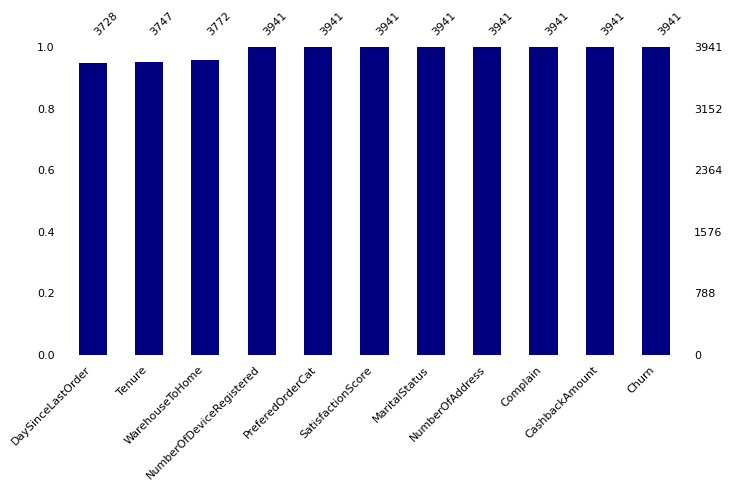

In [9]:
msno.bar(df, sort="ascending", figsize=(8,4), fontsize=8, color='navy');

**Matrix Plot**

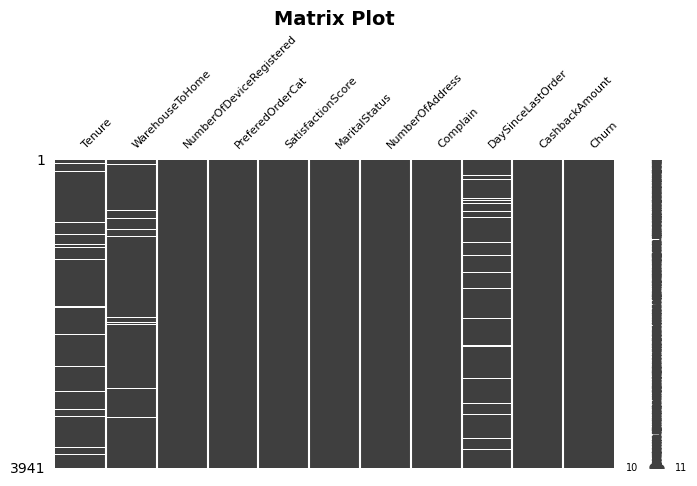

In [10]:
# Sebaran missing value di dalam data
msno.matrix(df, figsize=(8,4), fontsize=8).set_title('Matrix Plot', size=14, weight='bold');

Dari hasil tersebut dapat disimpulkan:
Missing Value:

- Pada variabel dengan missing values memiliki pola yang acak (tidak menunjukkan pola yang sama antar variabel).
- Pada bar plot diatas menunjukkan bahwa variabel DaySinceLastOrder, Tenure, dan WarehouseToHome adalah variabel-variabel yang memiliki missing values. Dari bar plot pun kita dapat mengetahui bahwa jumlah data yang hilang tidak begitu banyak.

1. **Tenure (194 missing value)**:
   - Terdapat 194 nilai yang hilang dalam variabel `Tenure`, yang merupakan masa jabatan pelanggan.
   - Nilai yang hilang dalam `Tenure` mungkin menunjukkan adanya pelanggan yang baru saja bergabung dan belum memiliki masa jabatan yang tercatat, atau mungkin ada kegagalan dalam merekam masa jabatan pelanggan. Perlu dicatat bahwa cara yang digunakan untuk merekam masa jabatan pelanggan bisa bervariasi tergantung pada sistem atau praktik bisnis perusahaan.

2. **WarehouseToHome (169 missing value)**:
   - Ada 169 nilai yang hilang dalam variabel `WarehouseToHome`, yang mengindikasikan jarak antara gudang dan rumah pelanggan.
   - Nilai yang hilang dalam `WarehouseToHome` mungkin disebabkan oleh kegagalan dalam merekam informasi jarak atau mungkin karena pelanggan tidak memberikan informasi jarak secara spesifik.

3. **DaySinceLastOrder (213 missing value)**:
   - Terdapat 213 nilai yang hilang dalam variabel `DaySinceLastOrder`, yang menunjukkan jumlah hari sejak pesanan terakhir.
   - Nilai yang hilang dalam `DaySinceLastOrder` bisa disebabkan oleh pelanggan yang belum membuat pesanan sebelumnya, mungkin karena mereka adalah pelanggan baru atau karena kegagalan dalam merekam data transaksi.

Data Duplikat:
jumlah: 671

1. **Data Sosial-Ekonomi:**
   - Kolom seperti MaritalStatus, NumberOfAddress, dan PreferedOrderCat memiliki jumlah kategori yang terbatas, seperti status perkawinan atau kategori preferensi pesanan. Jika populasi dalam dataset memiliki distribusi yang seragam untuk kategori-kategori ini, kemungkinan besar akan ada beberapa baris dengan karakteristik yang sama persis.

2. **Data Transaksi atau Interaksi:**
   - Kolom seperti Tenure, WarehouseToHome, DaySinceLastOrder, dan CashbackAmount menggambarkan informasi transaksi atau interaksi pelanggan dengan perusahaan. Dalam konteks ini, beberapa pelanggan mungkin memiliki transaksi atau interaksi yang sama persis dengan pelanggan lainnya, yang dapat menghasilkan baris data duplikat.

3. **Data Kepuasan dan Keluhan:**
   - Kolom SatisfactionScore dan Complain mungkin menggambarkan tingkat kepuasan pelanggan atau keberadaan keluhan. Jika beberapa pelanggan memiliki tingkat kepuasan atau keluhan yang sama persis, hal ini dapat menyebabkan baris data duplikat.

4. **Kolom Target (Churn):**
   - Kolom Churn adalah variabel target yang menunjukkan apakah pelanggan churn atau tidak. Dalam beberapa kasus, pelanggan dengan karakteristik yang sama persis dalam fitur-fitur lainnya mungkin memiliki label churn yang sama, yang dapat menghasilkan baris data duplikat.

Untuk penanganan data duplikat, tetap membiarkan data tersebut karena data ini bisa mencerminkan perilaku pembelian atau interaksi yang autentik dari pelanggan, dimana pelanggan mungkin menunjukkan preferensi atau kebiasaan yang seragam terhadap produk, layanan, atau kepuasan. Ini bisa sangat relevan untuk analisis yang bertujuan memahami pola pembelian, kepuasan pelanggan, atau faktor-faktor yang mempengaruhi keputusan churn.

#### **Data Distribution**

In [11]:
# cek distribusi data



kolom=['Churn','Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','DaySinceLastOrder','CashbackAmount']
distribusi=[]
for i in kolom:
    stats, pval=normaltest(df[i])
    if pval>0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')
        
pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
Churn,tidak normal
Tenure,tidak normal
WarehouseToHome,tidak normal
NumberOfDeviceRegistered,tidak normal
SatisfactionScore,tidak normal
NumberOfAddress,tidak normal
Complain,tidak normal
DaySinceLastOrder,tidak normal
CashbackAmount,tidak normal


Dapat diketahui bahwa data tidak terdistribusi dengan normal. Dengan memperhatikan karakteristik kolom-kolom tersebut, maka akan dilakukan penanganan missing values dengan imputasi median untuk EDA awal. Selain itu median juga tidak terlalu berpengauruh kepada outlier.

### **Inconsistent Data**

Terdapat fitur dengan kategori yang bermakna sama dengan kategori lain, contohnya: Mobile dan Mobile Phone pada kolom PreferedOrderCat . Oleh karena itu, kita melakukan perubahan pada masalah yang tersebut.

In [12]:
for col in df.columns:
       print("=="*10)
       print(f" {col}", df[col].unique())

 Tenure [15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]
 WarehouseToHome [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]
 NumberOfDeviceRegistered [4 3 6 2 5 1]
 PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
 SatisfactionScore [3 1 4 2 5]
 MaritalStatus ['Single' 'Married' 'Divorced']
 NumberOfAddress [ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]
 Complain [0 1]
 DaySinceLastOrder [ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]
 CashbackAmount [143.32 129.29 168.54 ... 147.66 231.86 153.73]
 Churn [0 1]


In [13]:
#Mengubah PreferedOrderCat Device dari Mobile jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

In [14]:
 # printing unique values of each columns
for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

Tenure: 
[15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]

WarehouseToHome: 
[ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]

NumberOfDeviceRegistered: 
[4 3 6 2 5 1]

PreferedOrderCat: 
['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Others' 'Grocery']

SatisfactionScore: 
[3 1 4 2 5]

MaritalStatus: 
['Single' 'Married' 'Divorced']

NumberOfAddress: 
[ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Complain: 
[0 1]

DaySinceLastOrder: 
[ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]

CashbackAmount: 
[143.32 129.29 168.54 ... 147.66 231.86 153.73]

Churn: 
[0 1]



**Imputasi Median pada Missing Values**

In [15]:
df_cleaned = df.copy()
df_cleaned.head()

# Imputasi nilai yang hilang dengan median untuk variabel numerik
for column in ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']:
    df_cleaned[column].fillna(df[column].median(), inplace=True)

df_cleaned.isna().sum()

df_cleaned = df.copy()

# Simpan nilai median untuk referensi di masa mendatang atau penggunaan ulang
median_values = {}
for column in ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']:
    median_value = df[column].median()
    median_values[column] = median_value
    df_cleaned[column].fillna(median_value, inplace=True)

# Verifikasi bahwa tidak ada nilai yang hilang setelah imputasi
df_cleaned.isna().sum()


Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Dataset sudah tidak memiliki nilai kosong 

## EDA Lanjutan

In [16]:
# Menampilkan statistik deskriptif dari numerical variable
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3941.0,10.028165,8.290290,0.0,3.0,9.00,15.00,61.00
WarehouseToHome,3941.0,15.579802,8.275800,5.0,9.0,14.00,20.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3941.0,4.448871,3.583909,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


In [17]:
# Menampilkan statistik deskriptif dari categorical variable
df_cleaned.describe(include='O').T

,count,unique,top,freq
PreferedOrderCat,3941,5,Laptop & Accessory,1458
MaritalStatus,3941,3,Married,2055


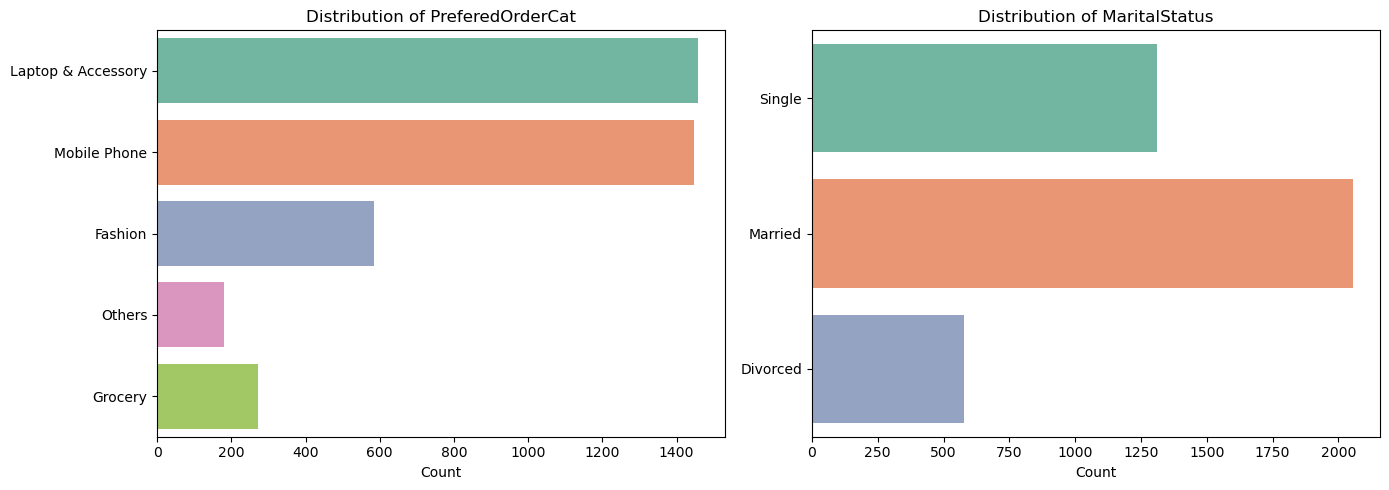

In [18]:
# Analisis Deskriptif untuk Variabel Kategorikal
categorical_columns = ['PreferedOrderCat', 'MaritalStatus']

# Visualisasi distribusi variabel kategorikal
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(14, 5))
for ax, column in zip(axes, categorical_columns):
    sns.countplot(y=column, data=df_cleaned, ax=ax, palette='Set2')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Count')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

Berdasarkan grafik distribusi dan statistik deskriptif yang disediakan, mari kita lakukan analisis untuk masing-masing kolom:

### Variabel Numerik

#### Tenure
- **Distribusi**: Tenure memiliki jangkauan dari 0 hingga 61 bulan dengan median 9 bulan, menunjukkan bahwa banyak pelanggan berada dalam tahap awal hubungan mereka dengan perusahaan.
- **Kesimpulan**: Perusahaan mungkin fokus pada peningkatan retensi pelanggan di bulan-bulan pertama untuk mengurangi churn.

#### WarehouseToHome
- **Distribusi**: Jarak dari gudang ke rumah pelanggan berkisar dari 5 hingga 127 dengan median 14. Terdapat variasi yang signifikan yang mungkin mencerminkan lokasi geografis yang berbeda.
- **Kesimpulan**: Penyelidikan lebih lanjut diperlukan untuk memahami apakah dan bagaimana jarak mempengaruhi kepuasan dan retensi pelanggan.

#### NumberOfDeviceRegistered
- **Distribusi**: Kebanyakan pelanggan telah mendaftarkan 3 hingga 4 perangkat, dengan maksimum 6 perangkat.
- **Kesimpulan**: Pelanggan dengan lebih banyak perangkat mungkin lebih terikat dan kurang mungkin churn.

#### SatisfactionScore
- **Distribusi**: Skor kepuasan berkisar dari 1 hingga 5. Rata-rata skor adalah 3, menunjukkan tingkat kepuasan yang moderat.
- **Kesimpulan**: Peningkatan layanan dan dukungan pelanggan bisa meningkatkan skor ini dan potensial retensi.

#### NumberOfAddress
- **Distribusi**: Pelanggan memiliki 1 hingga 22 alamat dengan median 3 alamat.
- **Kesimpulan**: Pelanggan dengan lebih banyak alamat mungkin menunjukkan mobilitas atau kebutuhan yang lebih tinggi, yang bisa mempengaruhi perilaku belanja.

#### Complain
- **Distribusi**: Sekitar 28% pelanggan telah mengajukan keluhan.
- **Kesimpulan**: Manajemen keluhan yang efektif sangat penting untuk mencegah pelanggan churn.

#### DaySinceLastOrder
- **Distribusi**: Hari sejak pesanan terakhir berkisar dari 0 hingga 46 hari dengan median 3 hari.
- **Kesimpulan**: Pelanggan yang baru-baru ini melakukan pembelian mungkin lebih terlibat dan kurang mungkin churn.

#### CashbackAmount
- **Distribusi**: Jumlah cashback berkisar dari 0 hingga 324,99 dengan median sekitar 163,34.
- **Kesimpulan**: Cashback yang lebih tinggi mungkin berfungsi sebagai insentif untuk retensi pelanggan.

### Variabel Kategorikal

#### PreferedOrderCat
- **Distribusi**: "Laptop & Accessory" adalah kategori yang paling banyak dipesan, diikuti oleh "Mobile Phone" dan "Fashion".
- **Kesimpulan**: Fokus pada kategori ini bisa membantu dalam mengoptimalkan stok dan promosi untuk pelanggan.

#### MaritalStatus
- **Distribusi**: Mayoritas pelanggan yang menikah mungkin mencerminkan basis pelanggan yang stabil atau keluarga.
- **Kesimpulan**: Segmentasi dan penargetan penawaran bisa disesuaikan berdasarkan status pernikahan.

Analisis ini memberikan wawasan yang dapat membantu perusahaan dalam mengidentifikasi area kunci untuk strategi retensi pelanggan. Memahami distribusi dan hubungan ini memungkinkan perusahaan untuk membuat keputusan yang lebih tepat dalam hal pemasaran, penjualan, dan dukungan pelanggan.

### **Data Correlation**

**Variabel Numerik vs Target**

Untuk dapat memahami korelasi antara feature numerical dengan target, maka dilakukanlah uji korelasi antar feature. Karena semua feature numerical tidak terdistribusi normal, maka uji korelasi akan menggunakan uji korelasi 'spearman'. Rentang hasil uji korelasi adalah dari -1 sampai dengan 1.

Kekuatan korelasi:
*   0 - 0.2: sangat lemah
*   0.2 - 0.4: lemah
*   0.4 - 0.6: moderate
*   0.6 - 0.8: kuat
*   0.8 - 1.0: sangat kuat

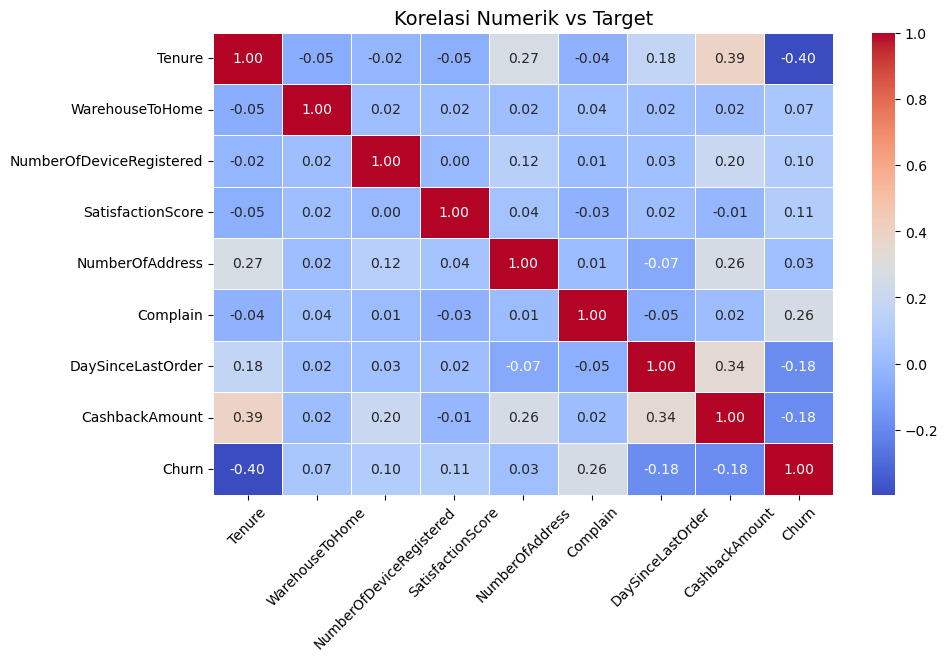

In [19]:
# Identifikasi kolom-kolom non-numerik
kolom_non_numerik = df_cleaned.select_dtypes(exclude=['number']).columns

# Hapus kolom-kolom non-numerik
df_numerik = df_cleaned.drop(columns=kolom_non_numerik)

# Menghitung korelasi menggunakan metode Spearman
corr = df_numerik.corr(method='spearman')

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Numerik vs Target', size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Berdasarkan hasil tersebut, kita dapat melihat hubungan antara berbagai variabel numerik dalam dataset dan variabel target `Churn`. Ini memberikan visualisasi dari korelasi antara setiap pasangan variabel.

- **`Tenure`**: Nilai korelasinya dengan `Churn` adalah -0.40, yang menunjukkan hubungan negatif yang moderat. Ini berarti semakin lama pelanggan memakai layanan perusahaan, semakin kecil kemungkinan mereka untuk churn.

- **`WarehouseToHome`**: Korelasinya dengan `Churn` adalah 0.07, yang sangat rendah. Ini mengindikasikan bahwa jarak dari gudang ke rumah pelanggan tidak memiliki hubungan yang signifikan dengan churn.

- **`NumberOfDeviceRegistered`**: Dengan korelasi 0.10, hubungannya dengan `Churn` juga rendah. Jumlah perangkat yang terdaftar mungkin tidak terlalu berpengaruh pada keputusan pelanggan untuk churn.

- **`SatisfactionScore`**: Memiliki korelasi sebesar 0.11 dengan `Churn`, menunjukkan hubungan yang lemah. Namun, ini menunjukkan bahwa semakin tinggi kepuasan pelanggan, semakin rendah kecenderungan mereka untuk churn.

- **`NumberOfAddress`**: Korelasinya dengan `Churn` adalah 0.03, yang juga rendah, mengindikasikan bahwa jumlah alamat yang terdaftar oleh pelanggan tidak banyak berpengaruh terhadap churn.

- **`Complain`**: Korelasinya dengan `Churn` adalah 0.26, menunjukkan hubungan positif yang moderat. Pelanggan yang mengajukan keluhan lebih cenderung churn, yang menunjukkan pentingnya menangani keluhan pelanggan dengan baik.

- **`DaySinceLastOrder`**: Korelasi negatif dengan `Churn` sebesar -0.18 menunjukkan bahwa semakin baru pelanggan melakukan pemesanan, semakin kecil kemungkinan mereka untuk churn.

- **`CashbackAmount`**: Ini memiliki korelasi negatif sebesar -0.18 dengan `Churn`. Meskipun hubungannya tidak terlalu kuat, ini bisa menunjukkan bahwa pelanggan yang menerima lebih banyak cashback cenderung bertahan.

Kita dapat menyimpulkan bahwa `Tenure`, `Complain`, dan sejauh ini `DaySinceLastOrder` dan `CashbackAmount` memiliki hubungan yang lebih signifikan dengan churn dibandingkan dengan variabel lain. Variabel seperti `WarehouseToHome` dan `NumberOfAddress` tampaknya kurang penting dalam memprediksi churn, berdasarkan analisis korelasi ini.

**Variabel Kategorikal vs Target**

Disini akan menggunakan uji chi-square. Adapun hipotesisnya sebagai berikut:

Ho: feature categorical dan target Churn tidak saling terkait (independent)  
Ha: feature categorical dan target Churn saling terkait (dependent)

In [20]:
cat_cols = list(df_cleaned.describe(include='O').columns)
chi2_result = []

for i in cat_cols:
  df_chi = pd.crosstab(df_cleaned[i], df_cleaned['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_result.append(round(pvalue, 5))

df_chi_result = pd.DataFrame({'categorical_features': cat_cols,'chi2_score': chi2_result})
df_chi_result['notes'] = np.where(df_chi_result['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_result

,categorical_features,chi2_score,notes
0,PreferedOrderCat,0.0,dependent
1,MaritalStatus,0.0,dependent


Berdasarkan hasil uji chi-square diatas, diketahui bahwa semua feature categorical memiliki chi-square score < 0.05 (berhasil menolak Ho). Artinya masing-masing feature categorical saling terkait dengan target Churn.

### Feature Engineering

**Membuat Fitur Interaktif:**  
Menggabungkan Tenure dengan MaritalStatus untuk membuat fitur baru yang menangkap interaksi antara dua variabel tersebut.

In [21]:
# membuat fitur interaktif untuk status 'Married' saja
df_cleaned['Married'] = (df_cleaned['MaritalStatus'] == 'Married').astype(int)
df_cleaned['Tenure_Married'] = df_cleaned['Tenure'] * df_cleaned['Married']

**Normalisasi Fitur Numerik**  
Normalisasi CashbackAmount menggunakan StandardScaler

In [22]:
scaler = StandardScaler()
df_cleaned['CashbackAmount_Normalized'] = scaler.fit_transform(df_cleaned[['CashbackAmount']])

### Feature Selection

**Evaluasi Korelasi:**

Memeriksa korelasi fitur-fitur baru dengan variabel target untuk menentukan apakah mereka harus disertakan.

In [23]:
# One-Hot Encoding menggunakan pandas.get_dummies()
df_encoded = pd.get_dummies(df_cleaned)

# Menghitung korelasi
correlation = df_encoded.corr()
target_correlation = correlation['Churn'].sort_values(ascending=False)
print(target_correlation)


Churn                                  1.000000
Complain                               0.261450
PreferedOrderCat_Mobile Phone          0.233089
MaritalStatus_Single                   0.187347
NumberOfDeviceRegistered               0.108464
SatisfactionScore                      0.107541
WarehouseToHome                        0.066391
NumberOfAddress                        0.039195
PreferedOrderCat_Fashion              -0.011464
MaritalStatus_Divorced                -0.018140
PreferedOrderCat_Others               -0.060240
PreferedOrderCat_Grocery              -0.092066
PreferedOrderCat_Laptop & Accessory   -0.149844
DaySinceLastOrder                     -0.156002
CashbackAmount                        -0.161535
CashbackAmount_Normalized             -0.161535
MaritalStatus_Married                 -0.163843
Married                               -0.163843
Tenure_Married                        -0.238196
Tenure                                -0.345922
Name: Churn, dtype: float64


#### Insight:
1. **Variabel Positif Berkorelasi Tinggi dengan Churn**:
   - `Complain` dan `PreferedOrderCat_Mobile Phone` menunjukkan korelasi positif yang signifikan dengan `Churn`. Ini menunjukkan bahwa pelanggan yang mengajukan keluhan dan pelanggan yang memilih kategori "Mobile Phone" cenderung lebih tinggi kemungkinannya untuk churn.

2. **Variabel Negatif Berkorelasi Tinggi dengan Churn**:
   - `Tenure`, `Tenure_Married`, dan `CashbackAmount` (termasuk versi yang dinormalisasi) menunjukkan korelasi negatif yang signifikan. Ini menunjukkan bahwa pelanggan dengan masa berlangganan yang lebih lama, terutama yang menikah, dan yang menerima cashback lebih tinggi cenderung memiliki risiko churn yang lebih rendah.

3. **Variabel dengan Korelasi Lemah**:
   - Beberapa variabel seperti `NumberOfAddress`, `DaySinceLastOrder_was_missing`, dan `PreferedOrderCat_Fashion` menunjukkan korelasi yang relatif lemah dengan `Churn`. Meskipun demikian, ini tidak berarti secara otomatis bahwa variabel-variabel tersebut tidak penting, karena mereka mungkin memegang informasi yang berguna ketika dikombinasikan dengan fitur lain atau dalam konteks yang berbeda.

#### Kesimpulan
1. **Pertahankan Fitur dengan Korelasi Kuat**: Fitur seperti `Complain`, `PreferedOrderCat_Mobile Phone`, `Tenure`, dan `CashbackAmount` harus dipertahankan karena mereka memiliki korelasi yang signifikan dengan `Churn`.

2. **Evaluasi Fitur Interaktif**: Fitur `Tenure_Married` menunjukkan bahwa kombinasi antara `Tenure` dan status pernikahan memiliki dampak yang signifikan terhadap churn. Fitur interaktif ini penting dan harus dipertahankan dalam model.

3. **Pertimbangkan Normalisasi**: `CashbackAmount` dan versi yang dinormalisasi sama-sama menunjukkan korelasi negatif yang signifikan dengan churn, menunjukkan bahwa penggunaan nilai yang dinormalisasi efektif. Ini validasi bahwa normalisasi fitur numerik adalah langkah yang berguna.

4. **Eksplorasi Lebih Lanjut pada Variabel Kategorikal**: Variabel seperti `PreferedOrderCat` yang dipecah menjadi beberapa kolom melalui one-hot encoding menunjukkan bahwa kategori tertentu memiliki pengaruh yang berbeda terhadap churn. Pertimbangkan untuk menjaga fitur-fitur ini terpisah daripada menggabungkannya kembali ke dalam satu variabel kategorikal.

5. **Analisis Variabel yang Menunjukkan Korelasi Lemah**: Jangan langsung mengecualikan variabel dengan korelasi lemah. Analisis lebih lanjut, mungkin dalam kombinasi dengan variabel lain atau melalui pembuatan fitur baru, mungkin mengungkapkan insight yang berguna.

6. **Uji Model dengan dan Tanpa Fitur "was_missing"**: Variabel seperti `WarehouseToHome_was_missing` dan `Tenure_was_missing` menunjukkan bahwa keberadaan nilai yang hilang itu sendiri bisa menjadi prediktor. Pertimbangkan untuk memasukkan fitur-fitur ini dalam model Anda dan uji apakah mereka meningkatkan performa.

Langkah selanjutnya adalah menerapkan insight ini ke dalam proses pemodelan Anda, baik dengan memasukkan fitur-fitur yang disarankan ke dalam model Anda, mengevaluasi performa model dengan berbagai kombinasi fitur, dan melakukan tuning hyperparameter untuk mengoptimalkan performa model.

### Data Spitting

In [24]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)


In [25]:
# Train Test Split dengan test size 80:20
X_train,X_test,y_train,y_test=train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2000)

In [26]:
X_train.head()


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Married,Tenure_Married,CashbackAmount_Normalized,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
2732,0.0,35.0,5,5,9,0,2.0,149.69,0,0.0,-0.553799,False,False,True,False,False,False,False,True
2868,1.0,7.0,5,1,1,0,5.0,166.74,1,1.0,-0.204311,False,False,True,False,False,False,True,False
1950,0.0,9.0,4,2,2,1,7.0,203.25,0,0.0,0.544066,True,False,False,False,False,True,False,False
1202,9.0,13.0,2,2,5,0,2.0,120.89,1,9.0,-1.144137,False,False,False,True,False,False,True,False
1058,4.0,14.0,3,4,4,0,0.0,264.22,0,0.0,1.793820,False,True,False,False,False,False,False,True


## Model Benchmarking

Beberapa hal yang diperhatikan pada benchmark model ini antara lain:


*  Dataset yang digunakan merupakan data imbalance sehingga perlu dilakukannya resampling. Metode resampling yang digunakan adalah SMOTE yaitu menambah data pada kelas minoritas.
*   Kemudian akan dilakukan stratified K-Fold yang bertujuan untuk mempertahankan distribusi kelas target(churn), pada saat data splitting untuk cross validation.
*   Metrik yang digunakan adalah ROC-AUC, karena ingin melihat probability dan kedua kelas sama pentingnya.
*   Hyperparameter disetting default dan semua fitur digunakan

In [27]:
# Mendefinisikan model yang akan dievaluasi
models = {
    "Logistic Regression": LogisticRegression(random_state=2000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=2000),
    "Random Forest": RandomForestClassifier(random_state=2000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Mendefinisikan SMOTE dan Stratified K-Fold
smote = SMOTE(random_state=2000)
cv = StratifiedKFold(n_splits=10)

# Dictionary untuk menyimpan skor ROC-AUC
roc_auc_scores = {}

# Melakukan resampling dengan SMOTE dan cross-validation untuk setiap model
for name, model in models.items():
    pipeline = IMBPipeline(steps=[('smote', smote), ('model', model)])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
    roc_auc_scores[name] = scores
    print(f"{name} ROC-AUC: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Logistic Regression ROC-AUC: 0.863 (+/- 0.039)
KNN ROC-AUC: 0.850 (+/- 0.058)
Decision Tree ROC-AUC: 0.831 (+/- 0.068)
Random Forest ROC-AUC: 0.946 (+/- 0.034)
XGBoost ROC-AUC: 0.951 (+/- 0.032)


Berdasarkan skor ROC-AUC dari benchmarking model Anda dengan SMOTE dan 10-fold cross-validation, berikut adalah analisisnya:

1. **XGBoost (ROC-AUC: 0.951 ± 0.032)**:
   - Model XGBoost memiliki performa terbaik dengan skor ROC-AUC tertinggi, yang menunjukkan efektivitasnya dalam membedakan antara pelanggan yang akan churn dan yang tidak.
   - Variabilitasnya relatif kecil (± 0.032), yang menunjukkan bahwa model ini stabil di berbagai subset data. Ini menunjukkan konsistensi yang baik dalam performa model.

2. **Random Forest (ROC-AUC: 0.946 ± 0.034)**:
   - Random Forest juga menunjukkan performa yang sangat baik dengan skor ROC-AUC yang hampir sama dengan XGBoost. Ini menunjukkan bahwa model ini juga efektif dan konsisten.
   - Variabilitas yang sedikit lebih tinggi dibandingkan XGBoost bisa disebabkan oleh sifat random dari model ini, tetapi masih menunjukkan stabilitas yang baik.

3. **Logistic Regression (ROC-AUC: 0.863 ± 0.039)**:
   - Logistic Regression memiliki skor ROC-AUC yang lebih rendah dibandingkan model-model ensemble. Walaupun demikian, skor ini masih cukup baik, menunjukkan kemampuan yang layak dalam memprediksi churn.
   - Variabilitas yang sedikit lebih tinggi menunjukkan bahwa model mungkin tidak seefisien model ensemble dalam menangani kompleksitas data atau fitur-fitur tertentu.

4. **KNN (ROC-AUC: 0.850 ± 0.058)**:
   - KNN menunjukkan kemampuan yang moderat dalam memprediksi churn, dengan skor ROC-AUC yang lebih rendah dibandingkan Logistic Regression.
   - Variabilitas yang lebih tinggi (± 0.058) menunjukkan bahwa performa model ini lebih sensitif terhadap perubahan dalam data pelatihan.

5. **Decision Tree (ROC-AUC: 0.831 ± 0.068)**:
   - Decision Tree memiliki skor ROC-AUC rata-rata yang paling rendah dan variabilitas yang paling tinggi, menunjukkan bahwa model ini mungkin mengalami overfitting atau kurang mampu menangkap kompleksitas dalam data dibandingkan model-model lainnya.

## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Mendefinisikan SMOTE
smote = SMOTE(random_state=2000)

# Mendefinisikan Stratified K-Fold dengan 10 splits
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2000)

# Hyperparameter grid untuk XGBoost
param_grid_xgb = {
    'model__subsample': [0.8],
    'model__n_estimators': [200],
    'model__max_depth': [5],
    'model__learning_rate': [0.1],
    'model__colsample_bytree': [0.9]
}

# Hyperparameter grid untuk Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# Mendefinisikan model dalam dictionary
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=2000),
        'params': param_grid_rf
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2000),
        'params': param_grid_xgb
    }
}

# Dictionary untuk menyimpan hasil pencarian hyperparameter terbaik dan skor untuk setiap model
best_models = {}

# Loop melalui model dan grid hyperparameter masing-masing
for model_name, model_dict in models.items():
    pipeline = IMBPipeline([
        ('smote', smote),
        ('model', model_dict['model'])
    ])
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model_dict['params'],
        n_iter=10,
        scoring='roc_auc',
        cv=cv,
        verbose=2,
        random_state=2000,
        n_jobs=-1
    )
    
    # Menjalankan pencarian pada data pelatihan
    print(f"Starting Randomized Search for {model_name}...")
    random_search.fit(X_train, y_train)
    
    # Menyimpan hasil
    best_models[model_name] = {
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'best_estimator': random_search.best_estimator_
    }
    
    print(f"{model_name} best hyperparameters:\n", random_search.best_params_)
    print(f"{model_name} best ROC-AUC score:", random_search.best_score_)


Starting Randomized Search for Random Forest...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Random Forest best hyperparameters:
 {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30, 'model__bootstrap': False}
Random Forest best ROC-AUC score: 0.9572017699988111
Starting Randomized Search for XGBoost...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
XGBoost best hyperparameters:
 {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.9}
XGBoost best ROC-AUC score: 0.9448039562599393


Hasil pencarian hyperparameter yang Anda berikan menunjukkan hasil yang sangat menarik:

1. **Random Forest**:
   - Setelah tuning, Random Forest mencapai ROC-AUC skor yang sangat tinggi yaitu 0.9572, yang lebih baik dibandingkan skor benchmark awal (0.946 ± 0.034).
   - Hyperparameter terbaik termasuk `n_estimators=100`, `max_depth=30`, dan `bootstrap=False`. Ini menunjukkan model yang cukup kompleks tanpa bootstrapping (penggunaan seluruh dataset untuk setiap pohon).
   - Model ini tampaknya menjadi pilihan terbaik saat ini, mengingat skor ROC-AUC yang dicapai melalui proses tuning.

2. **XGBoost**:
   - XGBoost menunjukkan sedikit penurunan skor ROC-AUC menjadi 0.9448 setelah tuning dari skor benchmark awal (0.951 ± 0.032).
   - Hyperparameter terbaik termasuk `n_estimators=200` dan `max_depth=5`
   - Meskipun ada sedikit penurunan skor, XGBoost tetap merupakan pilihan yang solid dengan performa yang kuat.

- **Random Forest vs XGBoost**: Random Forest tampaknya sedikit lebih unggul setelah tuning hyperparameter. Namun, perbedaan antara kinerja Random Forest dan XGBoost mungkin tidak signifikan dan bisa bervariasi tergantung pada data pengujian atau kebutuhan spesifik aplikasi.

In [29]:
# Menginisialisasi model XGBoost dengan hyperparameter optimal
optimal_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=2000
)

# Melatih model dengan data pelatihan
optimal_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=2000, ...)

### Feature Importance

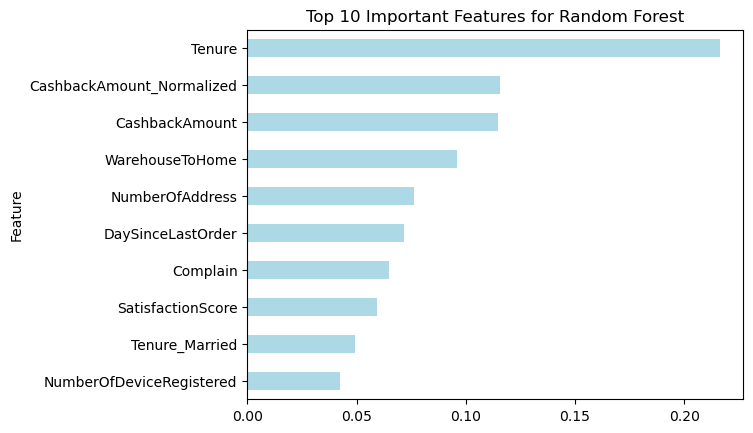

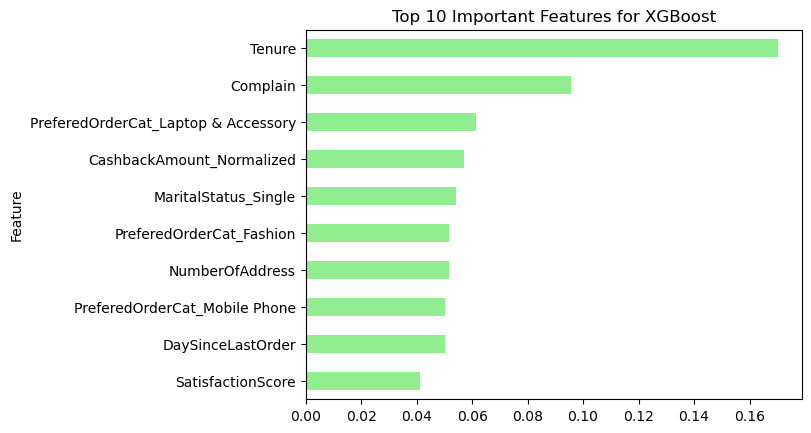

In [30]:
# Fitur penting dari Random Forest
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=False,
    random_state=2000
)

# Melatih model Random Forest dengan data pelatihan
best_rf.fit(X_train, y_train)

# Mendapatkan fitur penting dan nama fitur untuk Random Forest
rf_feature_importances = best_rf.feature_importances_
rf_feature_names = X_train.columns

# Membuat DataFrame untuk fitur penting Random Forest
rf_importances = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_feature_importances})
rf_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Visualisasi 10 fitur teratas untuk Random Forest
rf_importances[:10].plot(kind='barh', x='Feature', y='Importance', legend=False, color='lightblue')
plt.title('Top 10 Important Features for Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Fitur penting dari XGBoost
best_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=2000
)

# Melatih model XGBoost dengan data pelatihan
best_xgb.fit(X_train, y_train)

# Mendapatkan fitur penting dan nama fitur untuk XGBoost
xgb_feature_importances = best_xgb.feature_importances_
xgb_feature_names = X_train.columns

# Membuat DataFrame untuk fitur penting XGBoost
xgb_importances = pd.DataFrame({'Feature': xgb_feature_names, 'Importance': xgb_feature_importances})
xgb_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Visualisasi 10 fitur teratas untuk XGBoost
xgb_importances[:10].plot(kind='barh', x='Feature', y='Importance', legend=False, color='lightgreen')
plt.title('Top 10 Important Features for XGBoost')
plt.gca().invert_yaxis()
plt.show()


### Random Forest:

- **Tenure**: Fitur ini sangat penting menurut Random Forest, yang menunjukkan bahwa lama waktu pelanggan dengan layanan sangat mempengaruhi kemungkinan mereka untuk churn. Ini umum dalam banyak model churn di mana pelanggan yang lebih baru atau yang sudah sangat lama cenderung memiliki perilaku yang berbeda dari pelanggan dengan jangka waktu menengah.

- **CashbackAmount_Normalized**: Fitur ini muncul sebagai penting juga, yang berarti bahwa jumlah cashback yang disesuaikan dengan skala yang relevan mempengaruhi keputusan pelanggan untuk tetap atau pergi.

- **CashbackAmount**: Munculnya kedua versi fitur cashback, yang dinormalisasi dan yang tidak, bisa menunjukkan bahwa kedua skala tersebut (sebelum dan setelah normalisasi) memberikan informasi yang berguna.

- **WarehouseToHome**: Fitur yang berkaitan dengan logistik atau waktu pengiriman mungkin memiliki peran dalam kepuasan pelanggan dan keputusan churn.

- **NumberOfAddress**: Jumlah alamat yang terkait dengan akun bisa menjadi proxy untuk kestabilan atau aktivitas pelanggan, yang juga mempengaruhi churn.

### XGBoost:

- **Tenure**: Seperti dalam model Random Forest, fitur ini juga sangat penting dalam model XGBoost, menegaskan pentingnya durasi pelanggan dengan layanan.

- **Complain**: Menunjukkan bahwa pelanggan yang mengajukan keluhan lebih mungkin untuk churn, yang menyoroti pentingnya layanan pelanggan dan kepuasan pelanggan.

- **PreferedOrderCat_Laptop & Accessory**: Preferensi kategori produk tertentu dapat mengindikasikan perilaku pembelian yang berbeda yang berpengaruh terhadap keputusan untuk churn.

- **CashbackAmount_Normalized**: Lagi-lagi, cashback yang disesuaikan terbukti penting, memberikan wawasan serupa dengan model Random Forest.

- **MaritalStatus_Single** dan **PreferedOrderCat_Fashion**: Fitur-fitur ini menunjukkan bahwa demografi dan preferensi produk tertentu mungkin memiliki hubungan yang kuat dengan churn.

### Kedua Model:

- Kedua model menunjukkan beberapa fitur yang sama sebagai yang terpenting, seperti `Tenure` dan `CashbackAmount_Normalized`, yang menunjukkan bahwa fitur-fitur ini secara konsisten memberikan informasi penting di kedua model.

- Fitur-fitur seperti `Complain`, `NumberOfAddress`, dan `DaySinceLastOrder` juga muncul dalam daftar fitur penting di kedua model, yang menegaskan relevansi mereka dalam prediksi churn.

### Pickle

In [31]:
# Menyimpan model Random Forest
rf_filename = 'best_random_forest_model.sav'
with open(rf_filename, 'wb') as file:
    pickle.dump(best_models['Random Forest']['best_estimator'], file)

# Menyimpan model XGBoost
xgb_filename = 'best_xgboost_model.sav'
with open(xgb_filename, 'wb') as file:
    pickle.dump(best_models['XGBoost']['best_estimator'], file)

print(f"Model Random Forest telah disimpan sebagai {rf_filename}")
print(f"Model XGBoost telah disimpan sebagai {xgb_filename}")


Model Random Forest telah disimpan sebagai best_random_forest_model.sav
Model XGBoost telah disimpan sebagai best_xgboost_model.sav


## Kesimpulan
- Analisis menunjukkan bahwa faktor seperti Tenure, Complain, CashbackAmount, dan PreferedOrderCat_Mobile Phone memiliki pengaruh signifikan terhadap kecenderungan pelanggan untuk churn. Ini menunjukkan pentingnya memahami perilaku pelanggan dan faktor-faktor yang mempengaruhi kepuasan mereka.
- Model Random Forest dan XGBoost berhasil mengidentifikasi pelanggan berisiko tinggi churn dengan performa yang sangat baik, ditunjukkan oleh skor ROC-AUC Random Forest setelah tuning hyperparameter mencapai skor ROC-AUC sekitar 0.9572, dan XGBoost mencapai skor ROC-AUC sekitar 0.9448, meskipun sedikit lebih rendah dibandingkan Random Forest.

## Rekomendasi
- **Implementasi Model**: Gunakan model Random Forest dan XGBoost untuk mengidentifikasi pelanggan berisiko churn secara real-time, memungkinkan intervensi tepat waktu.
- **Waktu Penggunaan Model**: Model paling dipercaya ketika digunakan pada pelanggan dengan profil serupa dengan data pelatihan. Sebelum diterapkan pada segmen pelanggan yang berbeda, validasi model diperlukan.
- **Dampak Implementasi**: Implementasi model ini diharapkan dapat meningkatkan retensi pelanggan dengan mengurangi churn. Strategi retensi yang ditargetkan berdasarkan insight dari model dapat meningkatkan kepuasan dan loyalitas pelanggan.
- **Batasan dan Perbaikan**: Salah satu batasan proyek adalah potensi bias pada data pelatihan yang mungkin tidak mencakup semua segmen pelanggan. Untuk memperbaiki dan meningkatkan proyek, pertimbangkan penambahan data dari segmen pelanggan yang lebih beragam dan update model secara berkala untuk menjaga relevansinya.

### Langkah Lanjut
- **Analisis Lebih Lanjut**: Lakukan analisis segmentasi pelanggan untuk memahami kebutuhan dan perilaku pelanggan secara lebih detail.
- **Pengujian Model Secara Berkala**: Secara berkala uji model dengan data baru untuk memastikan keakuratannya tetap terjaga.
- **Eksplorasi Teknik Advanced**: Pertimbangkan penggunaan teknik machine learning yang lebih advanced atau deep learning untuk meningkatkan akurasi model.